# Neural Networks

- NNs: actually have little to do with human brain (of which we know not that much), and are often referred to as *artificial neural networks*. 
- ``Chains of differentiable, parameterised geometric functions, trained with gradient descent (with gradients obtained via the chain rule)``
- You may refer to the original chapter [here](https://www.mlfactor.com/NN.html) for some up-to-date researches on neural networks (on the predictive ability in financial markets).

## The original perceptron

- Rosenblatt (1958) for binary classification, a 'perceptron' model:
$$
f(\mathbf{x})=\left\{\begin{array}{lll}
1 & \text{if } \mathbf{x}'\mathbf{w}+b >0\\
0 & \text{otherwise}
\end{array}\right.
$$
The vector of weights $\mathbf{w}$ scales the variables and the bias $b$ shifts the decision barrier. Given $b$ and $w_i$, the error is $\varepsilon_i = y_i-1_{\left\{\sum_{j=1}^Jx_{i,j}w_j+w_0>0\right\}}$. As a custom, we set $b=w_0$ and add an initial column to $x$ as $x_{i,0}=1$ so that $\varepsilon_i = y_i-1_{\left\{\sum_{j=0}^Jx_{i,j}w_j>0\right\}}$.

- No closed-form solutions (as regressions), requiring approximation (by minimizing MSE)
- A simple way:
1. compute the current model value at point $\boldsymbol{x}_i: \tilde{y}_i=1_{\left\{\sum_{j=0}^Jx_{i,j}w_j>0\right\}}$
2. adjust the weight vector $w_j \leftarrow w_j + \eta(y_i-\tilde{y}_i)x_{i,j}$

The scaling factor $\eta$ is called the *learning rate*: preferable to be small to avoid overfitting (but slower convergence).

The mechanism is illustrated as the following figure:

![FIGURE 7.1: Scheme of a perceptron](images/figure7-1.png)

## Multilayer Perceptron

### Introduction and Notations

- "A linear model with activation functions"
- A popular representation can be illustrated as the following figure:

![FIGURE 7.2: Simplified scheme of a multi-layer perceptron](images/figure7-2.png)

A more faithful account of what is going on is laid out in the following figure:

![FIGURE 7.3: Detailed scheme of a perceptron with 2 intermediate layers](images/figure7-3.png)

#### Notations

- Data: $\boldsymbol{X}=x_{i,j}$ as features and $\boldsymbol{y}=y_i$ as output values. $\boldsymbol{x}$ or $\boldsymbol{x}_i$ denotes one line of $\boldsymbol{X}$.
- Number of layers: $L \geq 1$ and for each layer, the number of units $U_l \geq 1$.
- Weights for unit $k$ in layer $l$: $\boldsymbol{w}_k^{(l)}=w_{k,j}^{(l)}$ with biases $b_k^{(l)}$ with shape $(U_{l-1},1)$.
- Outputs (post-activation): $o_{i,k}^{(l)}$ for instance $i$, layer $l$ and unit $k$.

#### Process
The initial linear mapping:
$$v_{i,k}^{(1)}=\boldsymbol{x}_i'\boldsymbol{w}^{(1)}_k+b_k^{(1)},  \text{for } l=1, \quad k \in [1,U_1]$$
which is then transformed by a non-linear function $f^{(1)}$. The result of this alteration is then given as input of the next layer and so on. The linear forms will be repeated (with different weights) for each layer of the network:
$$v_{i,k}^{(l)}=(\boldsymbol{o}^{(l-1)}_i)'\boldsymbol{w}^{(l)}_k+b_k^{(l)}, \text{for } l \ge 2,  \quad k \in [1,U_l]$$
The connections between the layers are the so-called outputs, which are basically the linear mappings to which the activation functions $f^{(l)}$ have been applied. The output of layer $l$ is the input of layer $l+1$:
$$o_{i,k}^{(l)}=f^{(l)}\left(v_{i,k}^{(l)}\right)$$
Finally, the terminal stage aggregates the outputs from the last layer:
$$\tilde{y}_i =f^{(L+1)} \left((\boldsymbol{o}^{(L)}_i)'\boldsymbol{w}^{(L+1)}+b^{(L+1)}\right)$$

- Some common activation functions are illustrated as:

![FIGURE 7.4: Plot of the most common activation functions](images/figure7-4.png)

- Final activation function after the output: sometimes useful (`softmax` in classification tasks), be careful especially for *regression* tasks.

### Universal Approximator

- Given *any* bounded continuous function, there exists *a one-layer network* that can approximate this function up to arbitrary precision 
  - Cybenko (1989) for early references
  - section 4.2 in Du and Swamy (2013) and section 6.4.1 in Goodfellow et al. (2016) for more exhaustive lists of papers
  - Guliyev and Ismailov (2018) for recent results

- Formally, a one-layer perceptron is defined by
$$f_n(\boldsymbol{x})=\sum_{l=1}^nc_l\phi(\boldsymbol{x}\boldsymbol{w}_l+\boldsymbol{b}_l)+c_0$$
where $\phi$ is a (non-constant) bounded continuous function. Then, for any $\varepsilon>0$, it is possible to find one $n$ such that for any continuous function $f$ on the unit hypercube $[0, 1]^d$,
$$|f(\textbf{x})-f_n(\textbf{x})|< \epsilon, \quad \forall \textbf{x} \in [0,1]^d$$
- Intuition: add units to improve the fit
- Similar for polynomial approximation: see Costarelli et al. (2016)
- Speed of convergence: see Barron (1993), related to size
- For a neural network with only 1 intermediate layer with $n$ units and *sigmoid* activation function and MSE as the metric for the regression task. For $N$ randomly sampled i.i.d. points $y_i=f(x_i)+\varepsilon_i$ on which $f_n$ is trained, the best possible empirical MSE behaves like
$$\mathbb{E}\left[(f(x)-f_n(x))^2 \right]=\underbrace{O\left(\frac{c_f}{n} \right)}_{\text{size of network}}+\ \underbrace{O\left(\frac{nK \log(N)}{N} \right)}_{\text{size of sample}}$$
where $K$ is the dimension of the input and $c_f$ is a constant that depends on the generator function $f$. **Two components**:
1. *Complexity of the network*: the error decreases with the number of units in the network.
2. *Number of observations*: the error decreases at a slightly slower
pace with respect to the number of observations $(\log(N)/N)$ and is linear in the number of units and the size of the input.

Large sample + Small network / Small sample + Large network: both won't work!

## Learning via Back-propagation

Loss function with penalization:
$$O=\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)+ \text{penalization}$$
where $\tilde{y}_i$ are the values obtained by the model and $y_i$ are the true values of the instances (a simple requirement is that the loss function be differentiable).

Given $y_i$ fixed, let us write $D(\tilde{y}_i(\textbf{W}))=\text{loss}(y_i,\tilde{y}_i)$, where $\textbf{W}$ denotes the entirety of weights and biases in the network. Weights are updated via *gradient descent*:
$$\textbf{W} \leftarrow \textbf{W}-\eta  \frac{\partial D(\tilde{y}_i) }{\partial \textbf{W}}$$
The mechanism (and the effect of the learning rate $\eta$) is illustrated as following:

![FIGURE 7.5: Outline of gradient descent](images/figure7-5.png)

The above task (for differentiation) can be computationally expensive if there are many layers and requires the chain rule. A possible way to approximate is the *finite difference method*. For differentiable losses:
$$\frac{\partial D(\tilde{y}_i(w_k))}{\partial w_k} = \frac{D(\tilde{y}_i(w_k+h))-D(\tilde{y}_i(w_k-h))}{2h}+O(h^2)$$
where $h>0$ is some arbitrarily small number. However, this is also computationally costly because it requires a number of operations of the magnitude of the number of weights. A small trick is to *simply follow the chain rule and recycle terms along the way*.

Let us start by recalling
$$\tilde{y}_i =f^{(L+1)} \left((\boldsymbol{o}^{(L)}_i)'\boldsymbol{w}^{(L+1)}+b^{(L+1)}\right)=f^{(L+1)}\left(b^{(L+1)}+\sum_{k=1}^{U_L} w^{(L+1)}_ko^{(L)}_{i,k} \right)$$
so that if we differentiate with the most immediate weights and biases, we get
\begin{align*}
\frac{\partial D(\tilde{y}_i)}{\partial w_k^{(L+1)}}&=D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left( b^{(L+1)}+\sum_{k=1}^{U_L} w^{(L+1)}_ko^{(L)}_{i,k}  \right)o^{(L)}_{i,k} \\
&= D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left( v^{(L+1)}_{i,k}  \right)o^{(L)}_{i,k} \\
\frac{\partial D(\tilde{y}_i)}{\partial b^{(L+1)}}&=D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left( b^{(L+1)}+\sum_{k=1}^{U_L} w^{(L+1)}_ko^{(L)}_{i,k}  \right). 
\end{align*}
Now we must go back one layer and this can only be done via the chain rule. To access layer $L$, we recall identity $v_{i,k}^{(L)}=(\boldsymbol{o}^{(L-1)}_i)'\boldsymbol{w}^{(L)}_k+b_k^{(L)}=b_k^{(L)}+\sum_{j=1}^{U_L}o^{(L-1)}_{i,j}w^{(L)}_{k,j}$. We can then proceed
\begin{align*}
\frac{\partial D(\tilde{y}_i)}{\partial w_{k,j}^{(L)}}&=\frac{\partial D(\tilde{y}_i)}{\partial v^{(L)}_{i,k}}\frac{\partial v^{(L)}_{i,k}}{\partial w_{k,j}^{(L)}} = \frac{\partial D(\tilde{y}_i)}{\partial v^{(L)}_{i,k}}o^{(L-1)}_{i,j}\\
&=\frac{\partial D(\tilde{y}_i)}{\partial o^{(L)}_{i,k}} \frac{\partial o^{(L)}_{i,k} }{\partial v^{(L)}_{i,k}}  o^{(L-1)}_{i,j} = \frac{\partial D(\tilde{y}_i)}{\partial o^{(L)}_{i,k}}  (f^{(L)})'(v_{i,k}^{(L)})  o^{(lL1)}_{i,j} \\
&=\underbrace{D'(\tilde{y}_i) \left(f^{(L+1)} \right)'\left(v^{(L+1)}_{i,k}  \right)}_{\text{computed above!}} w^{(L+1)}_k (f^{(L)})'(v_{i,k}^{(L)})  o^{(L-1)}_{i,j},
\end{align*} 

where the first part of the last line was already computed above and we can *recycle* this number and only focus on the right part of the expression. *This process holds for the computation for weights and biases for any layer $l$*. 

You may refer to the [Google developer team](https://playerground.tensorflow.org) for a nice illustration of this process. When the data is formatted using tensors, it is possible to resort to vectorization so that the number of calls is limited to an order of the magnitude of the number of nodes (units) in the network.

The back-propagation algorithm is then summarized as following:
1. **Forward pass** as described in the following figure;
2. this allows the computation of the error or loss function;
3. all derivatives of this function (w.r.t. weights and biases) are computed, starting from the last layer and diffusing to the left (hence the term back-propagation) - the green arrows show the **backward pass**;
4. all weights and biases can be updated to take the sample points into account (the model is adjusted to reduce the loss/error stemming from these points).

![FIGURE 7.6: Diagram of back-propagation](images/figure7-6.png)

The learning rate $\eta$ can be refined. One option to reduce overfitting is to impose that *after each epoch, the intensity of the update decreases*. One possible parametric form is $\eta=\alpha e^{-\beta t}$, where $t$ is the epoch and $\alpha, \beta>0$. One further sophistication is to resort to so-called momentum (Polyak, 1964):
\begin{align*}
\textbf{W}_{t+1} & \leftarrow  \textbf{W}_{t} - \textbf{m}_t \quad \text{with} \\
\boldsymbol{m}_t & \leftarrow \eta \frac{\partial D(\tilde{y}_i)}{\partial \textbf{W}_{t}}+\gamma \boldsymbol{m}_{t-1}
\end{align*}
where $t$ is the index of the weight update. The idea of momentum is to speed up the convergence by including a memory term of the last adjustment ($\mathbf{m}_{t-1}$) and going in the same direction in the current update. A common choice for $\gamma$ is 0.9.

Some more complex and enhanced methods are:
- Nesterov (1983) improves the momentum term by forecasting the future shift in parameters
- Adagrad (Duchi et al., 2011): a different $\eta$ for each parameter
- Adadelta (Zeiler, 2012) and Adam (Kingma and Ba, 2014): Adagrad + momentum

**Gradient clipping**: avoid *gradient explosion* by setting a maximum magnitude for gradients (usually expressed as a norm) and rescale the gradient surpassing the threshold.

### Further details on classification

For classification tasks with the target *one-hot* label $\boldsymbol{y}_i$, the terminal activation function is generally the so-called `softmax` function. For a total of $J$ classes:
$$\tilde{\textbf{y}}_i=s(\textbf{x})_i=\frac{e^{x_i}}{\sum_{j=1}^Je^{x_j}}$$
which can take any value as input and sums to one over any (finite-valued) output, yielding a 'probability' vector over the classes.

The loss function is usually chosen as the `cross-entropy` loss. Given the target label $\boldsymbol{y}_i=(0,0,\dots,0,1,0,\dots,0)$ and the predicted output $\tilde{\boldsymbol{y}}_i=(\tilde{y}_{i,1},\dots,\tilde{y}_{i,L})$, the cross-entropy is defined as
$$\text{CE}(\boldsymbol{y}_i,\tilde{\boldsymbol{y}}_i)=-\sum_{j=1}^J\log(\tilde{y}_{i,j})y_{i,j}$$
which is a proxy of dissimilarity between the two arguments.

## How deep we should go and other practical issues

### Architectural choices
How big (or deep) the networks should be? Let us start by calculating the number of parameters in a network.

- For the first layer, there are $(U_0+1)U_1$ parameters where $U_0$ is the number of columns in $\mathbb{X}$ and $U_1$ is the number of units in the layer.
- For layer $l \in [2,L]$, there are $(U_{l-1}+1)U_l$ parameters.
- For the final output, there are simply $U_L+1$ parameters.
- In total, we have $\mathcal{N}=\left(\sum_{l=1}^L(U_{l-1}+1)U_l\right)+U_L+1$ parameters to optimize.

It is preferable that the sample size is *at least 10 times larger than* $\mathcal{N}$. Below a ratio of 5, the risk of overfitting is high.

The number of hidden layers (in current financial applications) rarely exceeds 3 or 4. The number of units per layer $(U_k)$ often follows the geometric pyramid rule (see e.g., Masters, 1993). If there are $L$ hidden layers with $I$ features in the input and $O$ dimensions in the output (for regression tasks, $O=1$), then for the $k^{th}$ layer, a rule of thumb for $U_k$ is
$$U_k\approx \left\lfloor O\left( \frac{I}{O}\right)^{\frac{L+1-k}{L+1}}\right\rfloor$$
If there is only one intermediate layer, the recommended proxy is the integer part of $\sqrt{IO}$. Often, the number of layers is *a power of two* for networks are trained with GPUs and TPUs which work optimally when the input have sizes equal to powers of two.

Large architectures do not always perform better than shallow ones (e.g., Gu et al. (2020b) and Orimoloye et al. (2019) for high frequency data, i.e., not factor-based). Take 3-4 hidden layers should be sufficient.

### Frequency of weight updates and learning duration

If the sample size is very large, the updating according to each point is very costly. The updating is then performed on groups of instances (known as **batches**):
$$\textbf{W} \leftarrow \textbf{W}-\eta  \frac{\partial \sum_{i \in \text{batch}} D(\tilde{y}_i)/\text{card}(\text{batch}) }{\partial \textbf{W}}$$

The change in weights is computed over the average loss computed over all instances in the batch:

- **Epoch**: one epoch is reached when each instance of the sample has contributed to the training. Often, training a NN requires a few dozen epochs.
- **Batch size**: the batch size is the number of samples used for one single update of weights.
- **Iterations**: the number of iterations can mean alternatively *the ratio of sample size divided by batch size* or this ratio multiplied by the number of epochs. It’s either the number of weight updates required to reach one epoch or the total number of updates during the whole training.

**Stochastic gradient descent** (SGD): chose a random instance as a batch.
**Mini Batches**: batch size strictly above 1 and chosen randomly without replacement.

The tuning for the number of epochs can depend on the specific tasks.

### Penalization and Dropout

Just as for tree methods, **penalization** helps slow down the learning to prevent overfitting on the training sample. The mathematical form:
$$O=\sum_{i=1}^I \text{loss}(y_i,\tilde{y}_i)+ \sum_{k} \lambda_k||\textbf{W}_k||_1+ \sum_j\delta_j||\textbf{W}_j||_2^2$$
where the subscripts $k$ and $j$ pertain to the weights to which the $L^1$ and (or) $L^2$ penalization is applied. 

Additionally, two types of **constraints** that can be enforced to weights:
- **Norm constraints**: a maximum norm is fixed for weight vectors or matrices
- **Non-negativity constraints**: all weights must be positive or zero.

**Dropouts**: reduce the risk of overfitting by simply reducing the size of the model (Srivastava et al., 2014). The weights of randomly chosen units are set to 0 and all links from and to the units are ignored, which mechanically shrinks the networks (when testing, the units are back and the weights are scaled to account for the missing activations due to dropouts).

Some readings:
- Bengio (2012) and Smith (2018): how to configure neural networks
- Lee (2020): hyperparameter tuning for stock return prediction

## Code samples and comments for vanilla MLP

We will use the [`Keras`](https://keras.io) framework (which is the high level API of [`Tensorflow`](https://www.tensorflow.org)).

### Regression Example

Before we head to the core of the NN, a short stage of data preparation is required. The data must be sort into 4 parts as training VS testing and labels VS features.

In [3]:
import pandas as pd

data_ml = pd.read_pickle('./data/data_ml.pkl')
X = data_ml[data_ml.columns[2:95]]
y = data_ml['R1M_Usd']

separation_date = pd.to_datetime('2014-01-15')
training_sample = data_ml[data_ml['date'] < separation_date]
test_sample = data_ml[data_ml['date'] > separation_date]

NN_train_features = training_sample[training_sample.columns[2:95]]
NN_train_labels = training_sample['R1M_Usd']
NN_test_features = test_sample[test_sample.columns[2:95]]
NN_test_labels = test_sample['R1M_Usd']

In `Keras`, the training of NNs is performed through 3 steps:

1. Defining the structure/architecture of the network
2. Setting the loss function and learning process (options on the updating of weights)
3. Train by specifying the batch sizes and number of rounds (epochs)

In [6]:
import keras
from keras.layers import Dense, Flatten, Input
from keras import Model
import keras.backend as K

K.clear_session()
input_layer = Input((NN_train_features.shape[1], ))
x = input_layer
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='tanh')(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model = Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense (Dense)               (None, 16)                1504      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,649
Trainable params: 1,649
Non-trainable params: 0
_________________________________________________________________


The definition of the structure is very intuitive and as my custom I would not like to use the alternative `Sequential` syntax. The input is iteratively transformed by a layer until the last iteration which gives the output. 

The activations that are currently available are listed [here](
https://keras.io/activations/). We use `tanh` on the second-to-last layer to yield both positive and negative outputs.

In [7]:
model.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)

We also notice that the summary of the model which lists the layers in their order from input to output. Because we are working with 93 features, the number of parameters for the first layer (16 units) is 93 plus one (for the bias) multiplied by 16, which makes 1504. For the second layer, the number of inputs is equal to the size of the output from the previous layer (16). Hence given the fact that the second layer has 8 units, the total number of parameters is $(16+1)*8 = 136$.

We set the loss function to the standard mean squared error. Other losses are listed [here](https://keras.io/losses/), some of them work only for regressions and others only for classification. 

The RMS propragation optimizer is the classical mini-batch back-propagation implementation. For other weight updating algorithms, we refer to [this website](https://keras.io/optimizers/). 

The metrics are used to measure the quality of the model. It can be different from the loss: for instance, using entropy for training and accuracy as the performance metric.

The final stage fits the model to the data and requires some additional training parameters:

In [8]:
fit_NN = model.fit(
    NN_train_features, NN_train_labels,
    epochs = 10, batch_size = 512,
    validation_data = (NN_test_features, NN_test_labels)
)

Epoch 1/10
387/387 [==============================] - 7s 6ms/step - loss: 0.0426 - mae: 0.1015 - val_loss: 0.0370 - val_mae: 0.0669
Epoch 2/10
387/387 [==============================] - 2s 4ms/step - loss: 0.0290 - mae: 0.0839 - val_loss: 0.0370 - val_mae: 0.0668
Epoch 3/10
387/387 [==============================] - 2s 5ms/step - loss: 0.0290 - mae: 0.0839 - val_loss: 0.0372 - val_mae: 0.0680
Epoch 4/10
387/387 [==============================] - 2s 5ms/step - loss: 0.0289 - mae: 0.0838 - val_loss: 0.0370 - val_mae: 0.0669
Epoch 5/10
387/387 [==============================] - 2s 6ms/step - loss: 0.0289 - mae: 0.0839 - val_loss: 0.0370 - val_mae: 0.0668
Epoch 6/10
387/387 [==============================] - 2s 6ms/step - loss: 0.0289 - mae: 0.0839 - val_loss: 0.0370 - val_mae: 0.0665
Epoch 7/10
387/387 [==============================] - 2s 6ms/step - loss: 0.0289 - mae: 0.0838 - val_loss: 0.0369 - val_mae: 0.0667
Epoch 8/10
387/387 [==============================] - 3s 8ms/step - loss: 0.

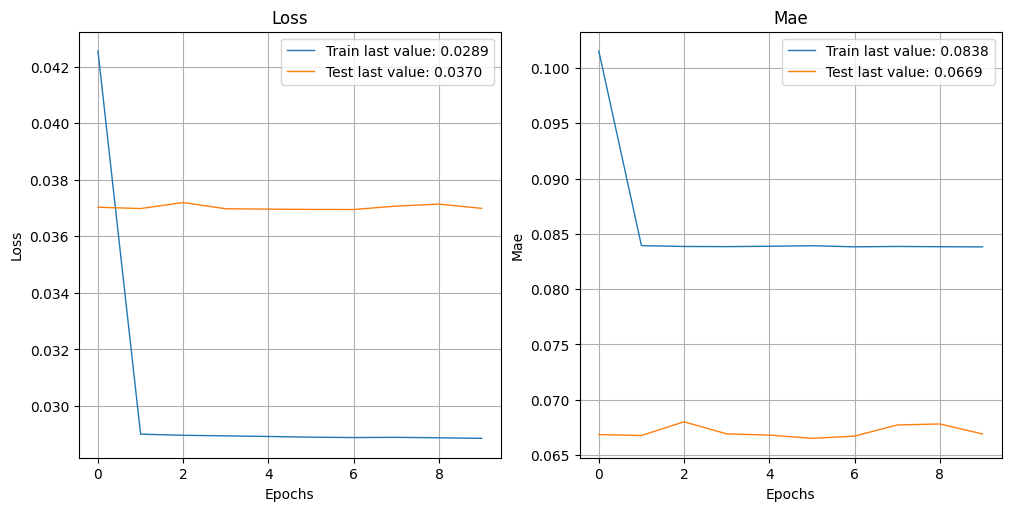

In [9]:
from plot_keras_history import show_history, plot_history

show_history(fit_NN)

You can see 4 different curves in the above figure produced by a nice designed API `plot_keras_history.show_history`. When the impact is negligible on the testing sample (the curve is flat, as is the case here), the model fails to generalize out-of-sample and seems to be learning noise.

The second graph with MAE as the metric shows the same behavior. You may use `model.get_weights()` to get the parameters of the model which is quite unnecessary here since there are thousands of weights.

Finally, from a practical point of view, the prediction is obtained via the usual `model.predict()` method. We use this method below on the testing sample to calculate the hit ratio.

In [16]:
label_prediction = model.predict(NN_test_features)

2194/2194 [==============================] - 3s 2ms/step


In [22]:
import numpy as np
np.mean(label_prediction.reshape(1, -1)[0] * NN_test_labels > 0) # Hit ratio

0.5281164539653601

Again, the hit ratio lies between 50% and 55%, which seems reasonably good. Most of the time, neural networks have their weights initialized randomly. Hence, two independently trained networks with the same architecture and same training data may well lead to very different predictions and performance. You may bypass this by using the `model.set_weights()` method.

### Classification Example

We pursue our exploration of neural networks with a much more detailed example. We will carry out a classification task on the binary label `R1M_Usd_C`.

Before we proceed, we need to format the label properly. To this purpose, we resort to one-hot encoding.

In [25]:
from keras.utils import to_categorical

NN_train_labels_C = to_categorical(training_sample['R1M_Usd_C'])
NN_test_labels_C = to_categorical(test_sample['R1M_Usd_C'])

The labels `NN_train_labels_C` and `NN_test_labels_C` have two columns: the first flags the instances with above median returns and the second flags those with below median returns. 

Below, we set the structure of the networks with many additional features compared to the first one.

In [29]:
from keras.constraints import non_neg
from keras.layers import Dropout
from keras.initializers import Constant
from keras.regularizers import L2

K.clear_session()
input_layer = Input((NN_train_features.shape[1], ))
x = input_layer
x = Dense(16, activation='tanh', 
          kernel_initializer="random_normal", 
          kernel_constraint=non_neg()
         )(x)
x = Dropout(0.25)(x)
x = Dense(8, activation='elu',
          bias_initializer=Constant(0.2),
          kernel_regularizer=L2(0.01))(x)
x = Dense(2, activation='softmax')(x) # softmax for classification
output_layer = x
model_C = Model(input_layer, output_layer)
model_C.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense (Dense)               (None, 16)                1504      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,658
Trainable params: 1,658
Non-trainable params: 0
_________________________________________________________________


In `Keras`, weights are referred to as the 'kernel'. The list of initializers is quite long and we suggest the interested reader has a look at the [`Keras` reference](https://keras.io/initializers/). Most of them are random, but some of them are constant.

Another family of options is the constraints and norm penalization that are applied on the weights and biases during training. In the above example, the weights of the first layer are coerced to be non-negative, while the weights of the second layer see their magnitude penalized by a factor $(0.01)$ times their $L^2$ norm.

In [30]:
from keras.optimizers import Adam

model_C.compile(loss='binary_crossentropy',
                optimizer=Adam(0.005, 0.9, 0.95),
                metrics=['categorical_accuracy'])

Note that the loss is cross-entropy (and a binary one because we work with 2 categories), but the more general form is the option `categorical_crossentropy` and works for any number of classes (strictly above 1).

For the `Adam` optimizer, the two betas (0.9 and 0.95) control decay rates for exponentially weighted moving averages used in the update of weights, which are exploited to increase the speed of learning.

In multiclass classification, the accuracy is defined as the average accuracy over all classes and all predictions, or, more detailedly, the proportion of times when the prediction is equal to the realized value.

Finally, we proceed to train the model.

In [31]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor="val_loss",
                         min_delta=0.001,
                         patience=3,
                         verbose=0)

fit_NN_C = model_C.fit(NN_train_features, 
                       NN_train_labels_C,
                       epochs=20, batch_size=512,
                       validation_data=(NN_test_features, NN_test_labels_C),
                    #    verbose=0, 
                       callbacks=[callback])

Epoch 1/20
387/387 [==============================] - 3s 6ms/step - loss: 0.7105 - categorical_accuracy: 0.5014 - val_loss: 0.6932 - val_categorical_accuracy: 0.4963
Epoch 2/20
387/387 [==============================] - 2s 5ms/step - loss: 0.6933 - categorical_accuracy: 0.4998 - val_loss: 0.6933 - val_categorical_accuracy: 0.5035
Epoch 3/20
387/387 [==============================] - 2s 5ms/step - loss: 0.6933 - categorical_accuracy: 0.5011 - val_loss: 0.6932 - val_categorical_accuracy: 0.5036
Epoch 4/20
387/387 [==============================] - 2s 4ms/step - loss: 0.6932 - categorical_accuracy: 0.5019 - val_loss: 0.6933 - val_categorical_accuracy: 0.5037


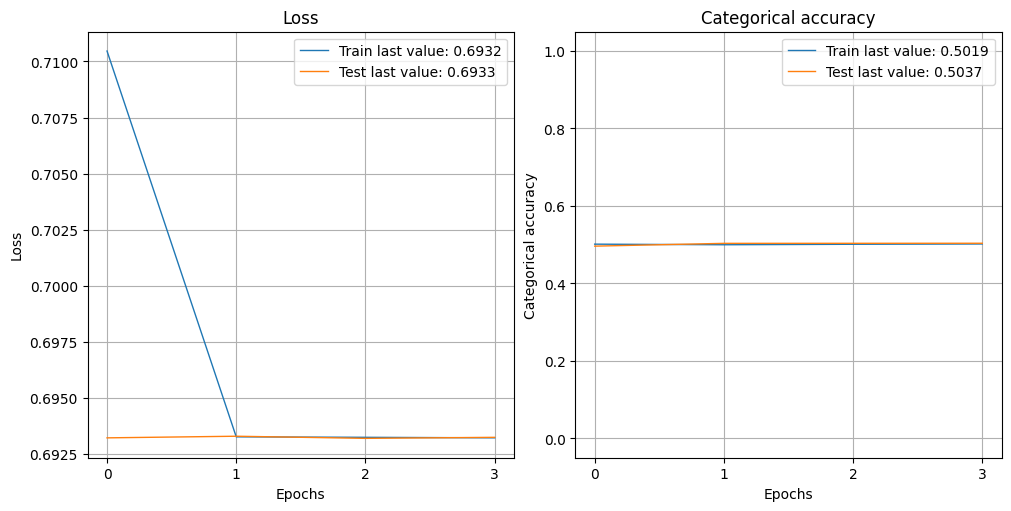

In [32]:
show_history(fit_NN_C)

In `Keras`, callbacks are functions that can be used at given stages of the learning process. In the above example, we use one such function to stop the algorithm when no progress has been made for some time.

When datasets are large, the training can be long, especially when batch sizes are small and/or the number of epochs is high. It is not guaranteed that going to the full number of epochs is useful, as the loss or metric functions may be plateauing much sooner. Hence, it can be very convenient to *stop the process if no improvement is achieved during a specified time-frame*.

In the code above, the improvement is focused on `val_acc` (the alternative is `val_loss`), and the `min_delta` sets the minimum improvement that needs to be attained for the algorithm to continue. The `patience` parameter asserts that the halting decision is made only after three consecutive epochs with no improvement.

Finally, the two graphs yield very different curves. One reason for that is the scale of the second graph. The range of accuracies is very narrow. Any change in this range does not represent much variation overall. The pattern is relatively clear on the training sample: the loss decreases, while the accuracy improves. Unfortunately, this does not translate to the testing sample which indicates that the model does not generalize well out-of-sample.

### Custom Losses

In `Keras`, it's possible to define user-specified loss functions. For instance, the quadratic error has 3 terms $y_i^2$, $\tilde{y}_i^2$ and $-2y_i\tilde{y}_i$. In practice, it can make sense to focus more on the latter term because it is the most essential: *we do want predictions and realized values to have the same sign*! 

Below we show how to optimize on a simple (product) function in `Keras`, $l(y_i,\tilde{y}_i)=(\tilde{y}_i-\tilde{m})^2-\gamma (y_i-m)(\tilde{y}_i-\tilde{m})$, where $m$ and $\tilde{m}$ are the sample averages of $y_i$ and $\tilde{y}_i$, with $\gamma>2$, we give more weight to the cross term.

In [33]:
K.clear_session()
input_layer = Input((NN_train_features.shape[1], ))
x = input_layer
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='sigmoid')(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_custom = Model(input_layer, output_layer)
# model.summary()

In [34]:
import tensorflow as tf
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - tf.reduce_mean(y_pred))) - \
        5 * tf.reduce_mean((y_true - tf.reduce_mean(y_true)) * (y_pred - tf.reduce_mean(y_pred)))

model_custom.compile(
    loss = custom_loss,
    optimizer='RMSprop',
    metrics=['mae']
)

In [35]:
fit_NN_cust = model_custom.fit(
    NN_train_features, NN_train_labels,
    epochs=10, batch_size=512,
    validation_data=(NN_test_features, NN_test_labels)
)

Epoch 1/10
387/387 [==============================] - 3s 6ms/step - loss: -3.3192e-04 - mae: 0.3906 - val_loss: -1.3538e-04 - val_mae: 0.4230
Epoch 2/10
387/387 [==============================] - 2s 5ms/step - loss: -9.1937e-04 - mae: 0.4607 - val_loss: 1.3374e-04 - val_mae: 0.4700
Epoch 3/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0011 - mae: 0.4792 - val_loss: -1.4585e-05 - val_mae: 0.5482
Epoch 4/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0012 - mae: 0.5262 - val_loss: -2.8036e-05 - val_mae: 0.5463
Epoch 5/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0013 - mae: 0.5430 - val_loss: -2.0998e-04 - val_mae: 0.5047
Epoch 6/10
387/387 [==============================] - 2s 5ms/step - loss: -0.0013 - mae: 0.5492 - val_loss: -1.4873e-04 - val_mae: 0.5479
Epoch 7/10
387/387 [==============================] - 4s 10ms/step - loss: -0.0014 - mae: 0.5695 - val_loss: 2.8296e-05 - val_mae: 0.5668
Epoch 8/10
387/387 [=======

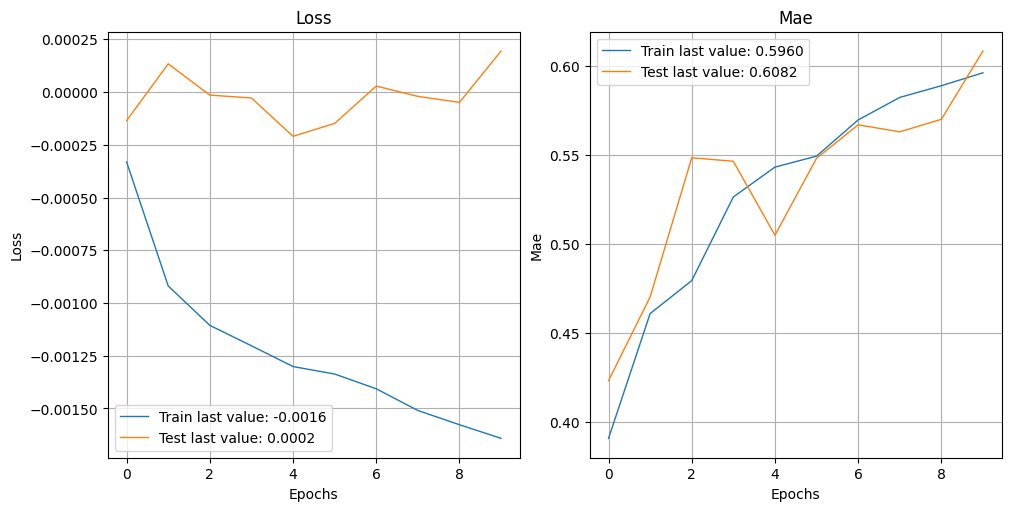

In [36]:
show_history(fit_NN_cust)

The curves may go in opposite direction. One reason for that is that while improving correlation between realized and predicted values, we are also increasing the sum of squared predicted returns.

In [37]:
np.mean(model_custom.predict(NN_test_features).reshape(1, -1)[0] * NN_test_labels > 0)

2194/2194 [==============================] - 3s 1ms/step


0.44688639471285324

The outcome could be improved. There are several directions that could help. One of them is arguably that the model should be dynamic and not static (see Chapter 12).

## Recurrent Networks

### Presentation

For some particular tasks with *sequential linkages* (e.g., time-series or speech recognition), it might be useful to *keep track of what happened with the previous sample* (i.e., there is a natural ordering).

One way to model 'memory' would be simply consider the following network with one intermediate layer:
\begin{align*}
\tilde{y}_i&=f^{(y)}\left(\sum_{j=1}^{U_1}h_{i,j}w^{(y)}_j+b^{(2)}\right) \\
\textbf{h}_{i} &=f^{(h)}\left(\sum_{k=1}^{U_0}x_{i,k}w^{(h,1)}_k+b^{(1)}+ \underbrace{\sum_{k=1}^{U_1}  w^{(h,2)}_{k}h_{i-1,k}}_{\text{memory part}} \right)
\end{align*}
where $h_0$ is customarily set at zero (vector-wise).

These kind of models are often referred to as Elman (1990) or Jordan (1997) models if the latter case $h_{i-1}$ is replaced by $y_{t-1}$ in the computation of $h_i$. Both type of models are **Recurrent Neural Networks (RNNs)**.

The $h_i$ is usually called the state or the *hidden layer*. The training of RNNs is complicated and requires unfolding the network illustrated by the following figure:

![FIGURE 7.9: Unfolding a recurrent network](images/figure7-9.png)

The main problem with RNNs is the *loss of momery* induced by **vanishing gradients**:
- Deep model
- A large number of products of derivatives of activation functions in the chain rule used in the back-propagation
  - generally smooth and smaller than 1. 
- Hence, these multiplication will lead to very small figures.
- Beyond some layers, the learning does not propagate because the adjustments are too small.

One way to prevent this was the famous **Long-Short Term Memory (LSTM) Model** introduced by Hochreiter and Schmidhuber (1997), and simplified by Chung et al. (2015). The **Gated Recurrent Unit (GRU)** is a slightly more complicated version of the vanilla RNN defined above:
\begin{align*}
\tilde{y}_i&=z_i\tilde{y}_{i-1}+ (1-z_i)\tanh \left(\textbf{w}_y'\textbf{x}_i+ b_y+ u_yr_i\tilde{y}_{i-1}\right) \quad \text{output (prediction)} \\
z_i &= \text{sig}(\textbf{w}_z'\textbf{x}_i+b_z+u_z\tilde{y}_{i-1})  \hspace{9mm} \text{`update gate'} \ \in (0,1)\\
r_i &= \text{sig}(\textbf{w}_r'\textbf{x}_i+b_r+u_r\tilde{y}_{i-1}) \hspace{9mm} \text{`reset gate'}  \ \in (0,1).
\end{align*}
In compact, this gives
$$\tilde{y}_i=\underbrace{z_i}_{\text{weight}}\underbrace{\tilde{y}_{i-1}}_{\text{past value}}+ \underbrace{(1-z_i)}_{\text{weight}}\underbrace{\tanh \left(\textbf{w}_y'\textbf{x}_i+ b_y+ u_yr_i\tilde{y}_{i-1}\right)}_{\text{candidate value (classical RNN)}}$$
where 
- $z_i$ decides the optimal mix between current and past values. 
- For the candidate value, $r_i$ decides which amount of past/memory to retain.
- $r_i$ is commonly referred to as the *reset gate* and $z_i$ to the *update gate*.

Some training issues:
- A local choice: one time-series (coherent) as a batch
- Another option: pass the final value $\tilde{y}_i$ of a batch to the next batch (as $\tilde{y}_0$) - *stateful mode*
- For portfolio prediction: careful for all above
- Up-to-date studies for LSTM in financial contexts: Fischer and Krauss (2018), Wang et al. (2020)

### Codes and Results

- Challenging in implementation for RNNs
- Serial linkages require more attention
- For asset pricing: the assets should be *separated* because the stock-specific time series cannot be bundled together

The dimensions of variables in `Keras` are defined as:
1. **The size of the batch**: *number of assets* in our case. Indeed, the recurrence relationship holds at the asset level, hence each asset will represent a new batch on which the model will learn.
2. **The time steps**: simply the number of dates in our case.
3. **The number of features**: in our case, there is only one possible figure which is the number of predictors.

For simplicity, we will use a subset of stocks as in Section 5.2.2.

In [56]:
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids_short = stock_days[stock_days['date'] == max(stock_days['date'])].index

data_rnn = data_ml[data_ml.stock_id.isin(stock_ids_short)]
training_sample_rnn = data_rnn[data_rnn.date < separation_date]
testing_sample_rnn = data_rnn[data_rnn.date > separation_date]

n_stocks = len(stock_ids_short)
n_feats = NN_train_features.shape[1]
n_dates_train = training_sample_rnn.shape[0] // n_stocks
n_dates_test = testing_sample_rnn.shape[0] // n_stocks

# Note that since we have applied a subset of the data
# The features should be re-defined
# WHICH WAS NOT DONE IN THE ORIGINAL BOOK
# AND FAILING TO RE-DEFINE THE FEATURES AND LABELS WILL LIKELY RESULT IN AN ERROR WHEN RESHAPING
train_features_rnn = training_sample_rnn[training_sample_rnn.columns[2:95]]
test_features_rnn = testing_sample_rnn[testing_sample_rnn.columns[2:95]]
train_labels_rnn = training_sample_rnn['R1M_Usd']
test_labels_rnn = testing_sample_rnn['R1M_Usd']

Then, we construct the variables we will pass as arguments. We recall that the data file was ordered first by stocks and then by date.

In [82]:
# Formats the data into array and a tricky order
train_features_rnn = np.reshape(train_features_rnn, (n_stocks, n_dates_train, n_feats)) 
test_features_rnn = np.reshape(test_features_rnn, (n_stocks, n_dates_test, n_feats))

train_labels_rnn = np.reshape(train_labels_rnn, (n_stocks, n_dates_train, 1))
test_labels_rnn = np.reshape(test_labels_rnn, (n_stocks, n_dates_test, 1))

Finally, we move towards the training part. For simplicity, we only consider a simple RNN with only one layer. In terms of recurrence structure, we pick a Gated Recurrent Unit (GRU).

In [73]:
from keras.layers import GRU

K.clear_session()
input_layer = Input((n_dates_train, n_feats))
x = input_layer
x = GRU(16, batch_input_shape = (n_stocks, n_dates_train, n_feats),
        activation='tanh', return_sequences=True)(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_rnn = Model(input_layer, output_layer)

model_rnn.compile(
    loss='mse',
    optimizer='RMSprop',
    metrics=['mae']
)

- For the argument `return_sequences`, we require the entirety of the sequence to avoid the problem in the dimensionality because the label is indeed a full sequence.

In [83]:
fit_RNN = model_rnn.fit(
    train_features_rnn, 
    train_labels_rnn,
    epochs=10, batch_size=n_stocks,
)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.1620 - mae: 0.3113
Epoch 2/10
1/1 [==============================] - 0s 229ms/step - loss: 0.2910 - mae: 0.4376
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.1370 - mae: 0.2819
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: 0.1118 - mae: 0.2476
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 0.1025 - mae: 0.2353
Epoch 6/10
1/1 [==============================] - 0s 40ms/step - loss: 0.0956 - mae: 0.2243
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 0.0896 - mae: 0.2151
Epoch 8/10
1/1 [==============================] - 0s 39ms/step - loss: 0.0845 - mae: 0.2066
Epoch 9/10
1/1 [==============================] - 0s 34ms/step - loss: 0.0800 - mae: 0.1990
Epoch 10/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0761 - mae: 0.1921


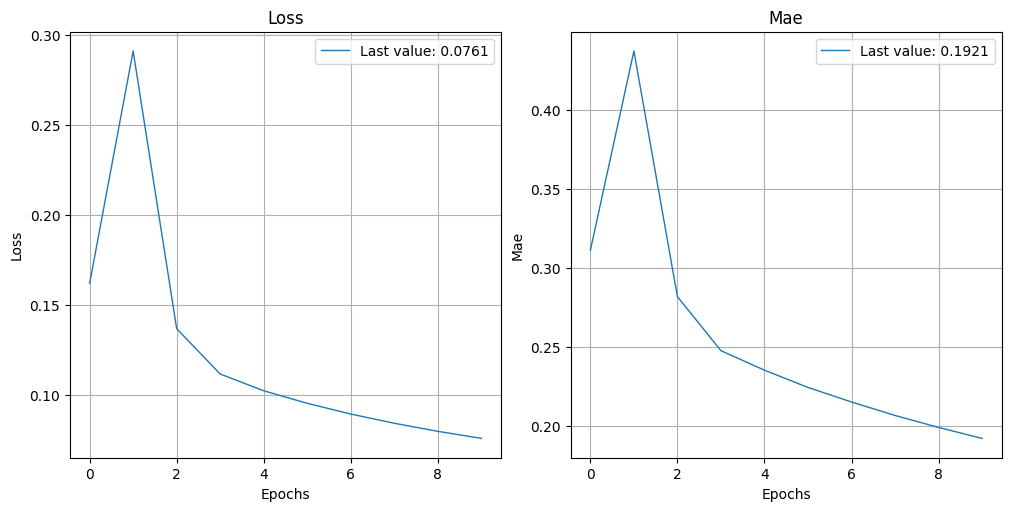

In [84]:
show_history(fit_RNN)

You may find that the validation data is missing for `Keras` is very restrictive on RNNs and imposes that both the training and testing samples share the same dimensions. We must bypass this by duplicating the model.

In [87]:
input_layer = Input((n_dates_test, n_feats)) # reset the input shape
x = input_layer
x = GRU(16,
        activation='tanh', return_sequences=True)(x)
x = Dense(1)(x) # No activation means linear activation: f(x) = x
output_layer = x
model_rnn_new = Model(input_layer, output_layer)
model_rnn_new.set_weights(model_rnn.get_weights())

In [88]:
pred_rnn = model_rnn_new.predict(test_features_rnn, batch_size=n_stocks)

1/1 [==============================] - 0s 319ms/step


In [97]:
np.mean(pred_rnn.reshape(1, -1)[0] * test_labels_rnn.reshape(1, -1)[0] > 0)

0.49968474148802017

The hit ratio is close to 50%, hence the model does hardly better than coin tossing.

Before we close this section on RNNs, we mention a new type architecture, called $\alpha$-RNN which are simpler compared to LSTMs and GRUs:
- Vanilla RNNs with a simple autocorrelation to generate long memory
- Dixon (2020) for details

## Other Common Architectures
The following structures are less mainstream and often hard to implement, thus we only stick to theorectical introductions.

### Generative Adversarial Networks (GANs)

- Idea: improve the accuracy of a classical NN by trying to *fool* it
  - Example: 'Fool' a Picasso painting expert with counterfeiter
- Two networks: the first one to learn (network $D$) and the second one to fool the first (network $G$)
- Two sets of data: one $(\boldsymbol{x})$ is true, stemming from $D$ and the other one $(\boldsymbol{z})$ fake, generated by $G$
- Input for $D$: classical training sample; Input for $G$: arbitrary noise
- $D$ and $G$ play the following *minimax* game:
$$\min_G \ \max_D \ \left\{ \mathbb{E}[\log(D(\boldsymbol{x}))]+\mathbb{E}[\log(1-D(G(\boldsymbol{z})))] \right\}$$
The first part $(\max)$ is the classical one to maximize the probability of assigning the correct label to all examples it seeks to classify (in the form of a utility-like function as in finance for $D(\boldsymbol{x})$).

Meanwhile, the expectation is evaluated over the fake instances, thus the right classification is the decreasing with $G(\boldsymbol{z})$, i.e., $1-D(G(\boldsymbol{z}))$.

The second, overarching, part $(\min)$ seeks to minimize the performance of the algorithm on the simualted data: shrinking the odds that $D$ finds out the data is indeed corrupt. A summarized version:
$$
\left. \begin{array}{rlll} 
\text{training sample}  = \boldsymbol{x} = \text{true data} && \\
\text{noise}= \boldsymbol{z} \quad \overset{G}{\rightarrow} \quad  \text{fake data}  &
\end{array} \right\} \overset{D}{\rightarrow} \text{output = probability for label}
$$
In ML-based asset pricing, the most notable application was introduced by Chen et al. (2020) to make use of the moment expression
$$\mathbb{E}[M_{t+1}r_{t+1,n}g(I_t,I_{t,n})]=0$$

- $I_{t,n}$ are firm-dependent (characteristics \& attributes)
- $I_t$ are macro-economic variables (e.g. credit/term spread, etc.)
- $g$ yields a $d-$dimensional output, leading to $d$ moment conditions
- Model the SDF as an unknown combination of assets $M_{t+1}=1-\sum_{n=1}^Nw(I_t,I_{t,n})r_{t+1,n}$.
- Network $D$ approximates the SDF via $w(I_t,I_{t,n})$.
- Network $G$ creates the moment condition through $g(I_t,I_{t,n})$ in the above equation.

The full specification of the network:
$$\min_w \ \max_g \ \sum_{j=1}^N \left\| \mathbb{E} \left[\left(1-\sum_{n=1}^Nw(I_t,I_{t,n})r_{t+1,n} \right)r_{t+1,j}g(I_t,I_{t,j})\right] \right\|^2$$
where the $L^2$ norm applies on the $d$ values generated via $g$. Intuitively,
- Network $D$ defined by $\boldsymbol{w}$ is the *asset pricing modeler*.
- Network $G$ defined by $\boldsymbol{g}$ seeks to find the *worst possible conditions* so that the model performs badly.
You may refer to Chen et al. (2020) for more details. GANs can also be used to generate artificial financial data (see Efimov and Xu (2019), Marti (2019), Wiese et al. (2020), Ni et al. (2020), and, relatedly, Buehler et al. (2020)).

### Autoencoders

Recent literatures involing `Autoencoders (AEs)`:
- Huck (2019): portfolio management
- Gu et al. (2020a): asset pricing

Characteristics of AEs:
- non-supervised algorithms
- Two networks
  - The first encodes the input into some intermediary input (*code*)
  - The second decodes the code into a modified version of the input
$$
\begin{array}{ccccccccc}
\boldsymbol{x} & &\overset{E}{\longrightarrow} && \boldsymbol{z} && \overset{D}{\longrightarrow} && \boldsymbol{x}' \\
\text{input} && \text{encoder} && \text{code} && \text{decoder} && \text{modified input}
\end{array}
$$
See Section 15.2.3 for further details. Gu et al. (2020a) add assumptions to the simple specification of the asset pricing model $r_t=\boldsymbol{\beta}_{t-1}\boldsymbol{f}_t+e_t$ that 
- *The betas depend on firm characteristics*
- The factors are possibly *non-linear* functions of the returns
$$r_{t,i}=\textbf{NN}_{\textbf{beta}}(\textbf{x}_{t-1,i})+\textbf{NN}_{\textbf{factor}}(\textbf{r}_t)+e_{t,i}$$
where $\textbf{NN}_{\textbf{beta}}$ and $\textbf{NN}_{\textbf{factor}}$ are two neural networks. The above *looks* like an autoencoder and you may see the coding of this structure in the exercise.

### A word on convolutional networks

- Why CNNs are useful? Because they allow to progressively *reduce the dimension of a large dataset by keeping local information*.
  - A **convolutional layer** will reduce the dimension of inputs.
  - Visually, this simplification is done by scanning and altering the values using rectangles with arbitrary weights.

An illustration of this process is sketched by the following figure (7.11):

![FIGURE 7.11: Scheme of a convolutional unit. Note: the dimensions are general and do not correspond to the number of squares.](images/figure7-11.png)

- The original data: a $(I\times K) x_{i,k}$ matrix
- Weights: matrix $w_{j,l}$ with size $(J\times L)$ with $J<I$ and $L<K$
- Scanning: transform size $(J\times L)$ into one real number
- Output size: $(I-J+1)\times (K-L+1)$
- Output values: $o_{i,k}=\sum_{j=1}^J\sum_{l=1}^Lw_{j,l}x_{i+j-1,k+l-1}$

Iteratively reducing the dimension with convolutional layers would be costly in computation and could cause overfitting. Thus, **pooling layers** are often used to *simplify the matrices by reducing them to a simple minimum/maximum or average* of the matrix:
$$o_{i,k}=f(x_{i+j-1,k+l-1}, 1\leq j\leq J, 1 \leq l\leq L)$$

The process is shown in the following figure (7.12):

![FIGURE 7.12: Scheme of pooling units](images/figure7-12.png)

It's possible to add a *stride* $v$ to omit cells: perform the operation only every $v$ value. You may refer to the illustration by the figure above.

Hoseinzade and Haratizadeh (2019) uses a CNN to predict the sign of price variations with price quotes, technical indicators and macro-economic data. It is worth noting that while this is clearly an interesting computer science exercise, *the deep economic motivation behind this choice of architecture remains unclear*.

### Advanced Architectures

In many ML tournaments in the 2010 decade, NNs have often been surpassed by tree-based models when dealing with *tabular data*. You may refer to
- Arik and Pfister (2019)
- Popov et al. (2019)
- Nuti et al. (2019)
for some novel NN structures or adapted trees methods.

## Coding Exercise

Autoencoder described in Gu et al. (2020a). The scheme of the model is illustrated by the following figure:

![FIGURE 7.13: Scheme of the autoencoder pricing model](images/figure7-13.png)

In order to harness the full potential of Keras, it is imperative to switch to more general formulations of NNs. This can be done via the so-called [functional API](https://keras.io/guides/functional_api/).

In [101]:
stock_days = data_ml[['date', 'stock_id']].groupby('stock_id').count()
stock_ids_short = stock_days[stock_days['date'] == max(stock_days['date'])].index

data_exercise = data_ml[data_ml.stock_id.isin(stock_ids_short)]
training_sample_exercise = data_exercise[data_exercise.date < separation_date]
testing_sample_exercise = data_exercise[data_exercise.date > separation_date]

n_stocks = len(stock_ids_short)
n_feats = NN_train_features.shape[1]
n_dates_train = training_sample_exercise.shape[0] // n_stocks
n_dates_test = testing_sample_exercise.shape[0] // n_stocks

# Note that since we have applied a subset of the data
# The features should be re-defined
# WHICH WAS NOT DONE IN THE ORIGINAL BOOK
# AND FAILING TO RE-DEFINE THE FEATURES AND LABELS WILL LIKELY RESULT IN AN ERROR WHEN RESHAPING
train_features_exercise = training_sample_exercise[training_sample_exercise.columns[2:95]]
test_features_exercise = testing_sample_exercise[testing_sample_rnn.columns[2:95]]
train_labels_exercise = training_sample_exercise['R1M_Usd']
test_labels_exercise = testing_sample_exercise['R1M_Usd']

In [102]:
# Formats the data into array and a tricky order
train_features_exercise = np.reshape(train_features_exercise, (n_dates_train, n_stocks, n_feats))
test_features_exercise = np.reshape(test_features_exercise, (n_dates_test, n_stocks, n_feats))

train_labels_exercise = np.reshape(train_labels_exercise, (n_dates_train, n_stocks, 1))
test_labels_exercise = np.reshape(test_labels_exercise, (n_dates_test, n_stocks, 1))

In [116]:
from keras.layers import Permute, Dot
# The factor model
K.clear_session()
factor_input = Input(shape=(n_stocks, ), name='factor_input')
x = factor_input
x = Dense(16, activation='relu')(x)
x = Dense(8, activation='tanh')(x)
factor_output = x

# The beta model
beta_input = Input(shape=(n_stocks, n_feats), name='beta_input')
y = beta_input
y = Dense(16, activation='relu')(y)
y = Dense(8, activation='tanh')(y)
y = Permute((2, 1))(y) # Permutation to align the dimensions
beta_output = y

main_output = Dot(axes=1)([beta_output, factor_output])
model_exercise = Model(inputs=(factor_input, beta_input), outputs=main_output)
model_exercise.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 beta_input (InputLayer)        [(None, 793, 93)]    0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 793, 16)      1504        ['beta_input[0][0]']             
                                                                                                  
 factor_input (InputLayer)      [(None, 793)]        0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 793, 8)       136         ['dense_2[0][0]']                
                                                                                              

In [117]:
model_exercise.compile(
    optimizer='RMSprop',
    loss='mse',
    metrics=['mae']
)

model_exercise.fit(
    x=(train_labels_exercise, train_features_exercise),
    y=train_labels_exercise,
    batch_size=49, 
    epochs=10,
    verbose=2
)

Epoch 1/10
4/4 - 1s - loss: 0.0839 - mae: 0.1915 - 888ms/epoch - 222ms/step
Epoch 2/10
4/4 - 0s - loss: 0.0451 - mae: 0.1217 - 161ms/epoch - 40ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0397 - mae: 0.1086 - 48ms/epoch - 12ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0373 - mae: 0.1015 - 40ms/epoch - 10ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0358 - mae: 0.0972 - 40ms/epoch - 10ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0348 - mae: 0.0941 - 41ms/epoch - 10ms/step
Epoch 7/10
4/4 - 0s - loss: 0.0339 - mae: 0.0912 - 40ms/epoch - 10ms/step
Epoch 8/10
4/4 - 0s - loss: 0.0335 - mae: 0.0899 - 40ms/epoch - 10ms/step
Epoch 9/10
4/4 - 0s - loss: 0.0333 - mae: 0.0889 - 31ms/epoch - 8ms/step
Epoch 10/10
4/4 - 0s - loss: 0.0349 - mae: 0.0917 - 48ms/epoch - 12ms/step


## Takeaways

- **Neural Networks**: ANN, chains of differentiable, parameterised geometric functions, trained with gradient descent
- **Multilayer Perceptron**: building blocks connected with non-linear activation functions
  - A one-layer perceptron can serve as an universal approximation
  - Loss function: MSE for regression and cross-entropy for classification
  - Learning process: back-propagation with chains rules, the gradient will have two parts, one recycable part and another local part
  - Hyperparameters tuning and optimizers
  - `Softmax` activation function for classification
- Training Issues
  - Architecture Choices
    - The number of units (nodes): usually power of 2
  - **Epochs, batch size and iterations** for weight updating
  - **Penalizations and Dropout**: avoid overfitting
- **RNNs**: often used for "series"
  - Feed the output of the last layer as a 'memory' to the following layers
  - Problem: vanishing gradients
  - One improved architecture: **LSTM** Model (and GRU)
- Other architectures
  - GANs: two networks with one learner and another one to 'fool'
  - Autoencoders: non-supervised, two networks to "code" and "decode"
  - CNNs: dimension reduction